<a href="https://colab.research.google.com/github/binhduc0402/BT_AI/blob/main/Tip_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=39fe00ea58833c3dce1666944ef21d195d54b6f2558dbcc40346cd8706525f6c
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import skfuzzy as fuzzy
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(50,81,1)
slow=fuzzy.trimf(x,[50,50,60])
medium=fuzzy.trimf(x,[50,60,70])
mediumFast=fuzzy.trimf(x,[60,70,80])
fullSpeed=

plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'r',linewidth=1.5,label='medium')
plt.plot(x,mediumFast,'r',linewidth=1.5,label='Fast')

24.166666666666668


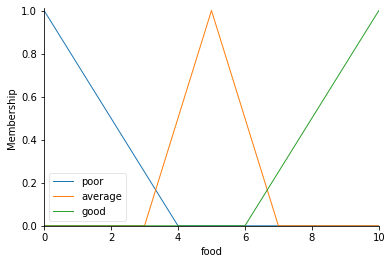

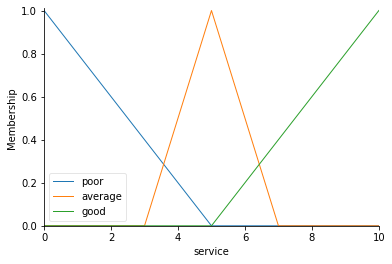

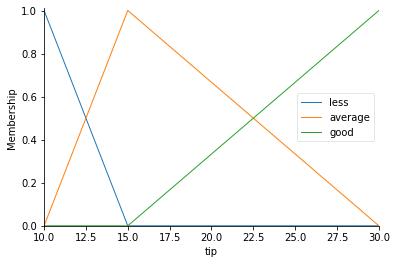

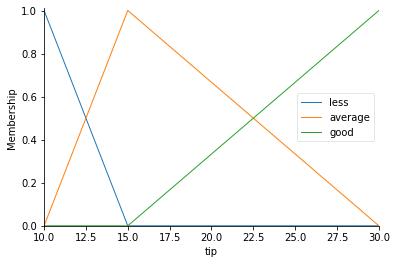

In [24]:
import skfuzzy as fuzzy
import numpy as np
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
food=ctrl.Antecedent(np.arange(0,11,1),'food')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(10,31,1),'tip')
food['poor']=fuzzy.trimf(food.universe,[0,0,4])
food['average']=fuzzy.trimf(food.universe,[3,5,7])
food['good']=fuzzy.trimf(food.universe,[6,10,10])
service['poor']=fuzzy.trimf(service.universe,[0,0,5])
service['average']=fuzzy.trimf(service.universe,[3,5,7])
service['good']=fuzzy.trimf(service.universe,[5,10,10])
tip['less']=fuzzy.trimf(tip.universe,[10,10,15])
tip['average']=fuzzy.trimf(tip.universe,[10,15,30])
tip['good']=fuzzy.trimf(tip.universe,[15,30,30])
food.view()
service.view()
tip.view()

rule1=ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2=ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3=ctrl.Rule(food['poor']&service['good'],tip['average'])
rule4=ctrl.Rule(food['average']&service['good'],tip['good'])
rule5=ctrl.Rule(food['average']&service['average'],tip['average'])
rule6=ctrl.Rule(food['average']&service['poor'],tip['less'])
rule7=ctrl.Rule(food['good']&service['poor'],tip['average'])
rule8=ctrl.Rule(food['good']&service['average'],tip['good'])
rule9=ctrl.Rule(food['good']&service['good'],tip['good'])

tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=6
tipping.input['service']=10
tipping.compute()
print(tipping.output['tip'])
tip.view(sin=tipping)